# Titanic Worked Example 
Author: Andrew Szwec

<img src="./images/titanic.jpg" alt="Titanic" width=400 height=600>

<img src="./images/titanic_voyage.jpg" alt="Voyage" width=800>

## Hypothesis

**In the Titanic passenger dataset downloaded from https://github.com/generalassembly-studio/dat10syd/tree/master/data, containing data from 2/4/1912 to 14/4/1912, passengers in 1st class (Pclass==1) have a higher likelihood of survival than passengers in 3rd class (Pclass==3).**

<img src="./images/smart.png" alt="Smart" width=600>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## Count of Survived by passenger class

In [4]:
df.groupby(['Pclass', 'Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [5]:
# Using Function
def survived_name(x):
    if x == 0:
        return 'Perished'
    else:
        return 'Survived'
    
survived_name('string')    

'Survived'

In [6]:
# Using Dictionary
class_dict = {1: '1st', 2: '2nd', 3: '3rd'}
    
df['SurvivedDesc'] = df['Survived'].apply(survived_name)
df['PclassDesc'] = df['Pclass'].apply(class_dict.get)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedDesc,PclassDesc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perished,3rd
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,1st
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,3rd
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,1st
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perished,3rd


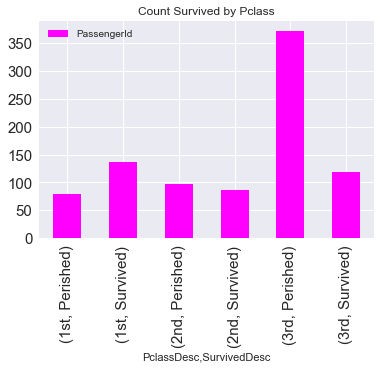

In [7]:
df.groupby(['PclassDesc', 'SurvivedDesc']).count()['PassengerId'] \
    .plot(kind='bar', stacked=True, title='Count Survived by Pclass' \
          , legend=True, fontsize=15, colormap='spring')

This does not prove that you were more likely to survive in 3rd class. It just shows there were more people in 3rd class that did survive, but what were the volume of 3rd class passengers compared to 1st class?

                         PassengerId
PclassDesc SurvivedDesc             
1st        Perished               80
           Survived              136
2nd        Perished               97
           Survived               87
3rd        Perished              372
           Survived              119
                         PassengerId
PclassDesc SurvivedDesc             
1st        Perished        37.037037
           Survived        62.962963
2nd        Perished        52.717391
           Survived        47.282609
3rd        Perished        75.763747
           Survived        24.236253


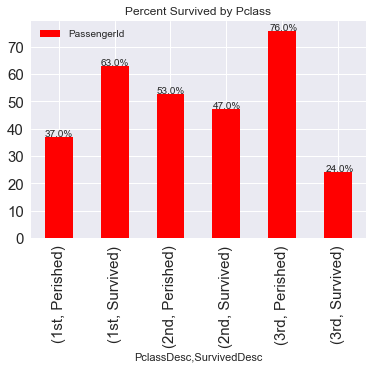

In [8]:
# Percent by Volume
grp_class_surv = df.groupby(['PclassDesc', 'SurvivedDesc']).agg({'PassengerId': 'count'})
print(grp_class_surv)

# Calculate Percentage
grp_perc = grp_class_surv.groupby(level=0).apply(lambda x:  x / float(x.sum()) * 100)
# Print table
print(grp_perc)

ax = grp_perc.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [9]:
grp_perc.index

MultiIndex(levels=[['1st', '2nd', '3rd'], ['Perished', 'Survived']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['PclassDesc', 'SurvivedDesc'])

# Lets look at Survived only

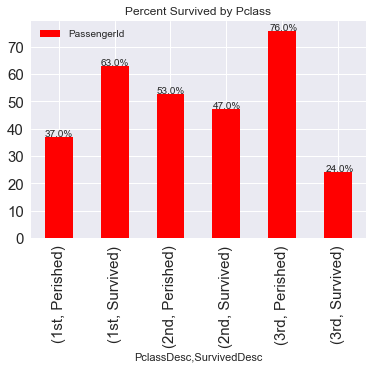

In [10]:
# Percent by Volume
grp_class_surv = df.groupby(['PclassDesc', 'SurvivedDesc']).agg({'PassengerId': 'count'})
# Calculate Percentage
grp_perc = grp_class_surv.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


ax = grp_perc.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

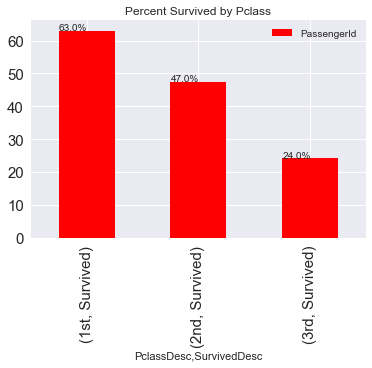

In [11]:
a = grp_perc.reset_index()[grp_perc.reset_index().SurvivedDesc == 'Survived'].set_index(['PclassDesc', 'SurvivedDesc'])

ax = a.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

## Conclusion
After analysising the Titanic dataset the hypothesis has been proven true. The above figure shows that the likelihood of survival for a 1st class passenger is 63%, while the likelihood of a 3rd class passenger is 24%.


  


## Lets Explore this dataset further

In [12]:
grp = df.groupby('Sex').count()['Survived'].reset_index()
grp

,Sex,Survived
0,female,314
1,male,577


## Pandas Plotting Cookbook
### Charts
https://pandas.pydata.org/pandas-docs/stable/visualization.html
### Plotting Options
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
## Colour Maps
https://matplotlib.org/users/colormaps.html

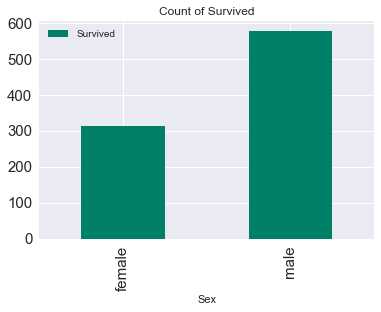

In [13]:
grp.set_index('Sex').plot.bar(title='Count of Survived', legend=True, fontsize=15, colormap='summer')

In [14]:
grp = df.groupby(['Sex', 'Pclass']).count()['Survived'].reset_index()
grp

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


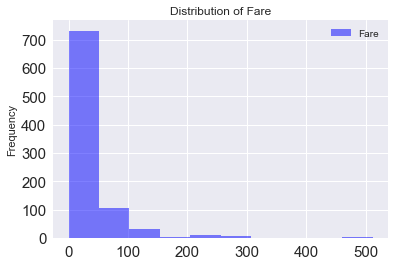

In [15]:
df['Fare'].plot.hist(alpha=0.5, title='Distribution of Fare', legend=True, fontsize=15, colormap='winter')

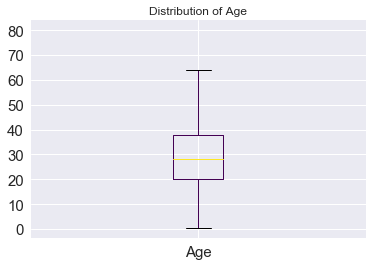

In [16]:
df['Age'].plot.box( title='Distribution of Age', legend=True, fontsize=15, colormap='viridis')



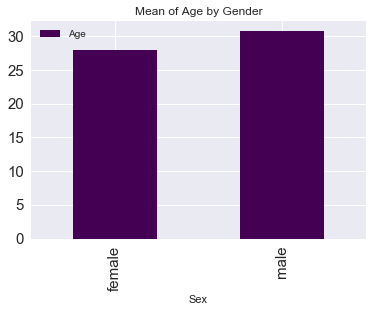

In [17]:
df.groupby('Sex').mean()['Age'].plot(kind='bar', title='Mean of Age by Gender', legend=True, fontsize=15, colormap='viridis')


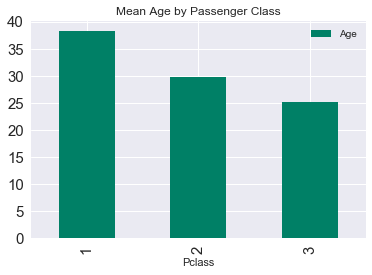

In [18]:
df.groupby('Pclass').mean()['Age'].plot(kind='bar', title='Mean Age by Passenger Class', legend=True, fontsize=15, colormap='summer')


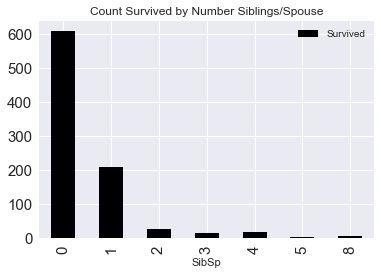

In [19]:
df.groupby('SibSp').count()['Survived'].plot(kind='bar', title='Count Survived by Number Siblings/Spouse', legend=True, fontsize=15, colormap='inferno')

## Subset to the useful columns

In [20]:
dd = df[['Survived', 'SibSp', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']]
dd.head()

,Survived,SibSp,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,1,3,male,22.0,0,7.2500,S
1,1,1,1,female,38.0,0,71.2833,C
2,1,0,3,female,26.0,0,7.9250,S
3,1,1,1,female,35.0,0,53.1000,S
4,0,0,3,male,35.0,0,8.0500,S


## Correlation of key variables and Target

In [21]:
sns.set(style="white")

# Compute the correlation matrix
corr = dd.corr()

corr

,Survived,SibSp,Pclass,Age,Parch,Fare
Survived,1.000000,-0.035322,-0.338481,-0.077221,0.081629,0.257307
SibSp,-0.035322,1.000000,0.083081,-0.308247,0.414838,0.159651
Pclass,-0.338481,0.083081,1.000000,-0.369226,0.018443,-0.549500
Age,-0.077221,-0.308247,-0.369226,1.000000,-0.189119,0.096067
Parch,0.081629,0.414838,0.018443,-0.189119,1.000000,0.216225
Fare,0.257307,0.159651,-0.549500,0.096067,0.216225,1.000000


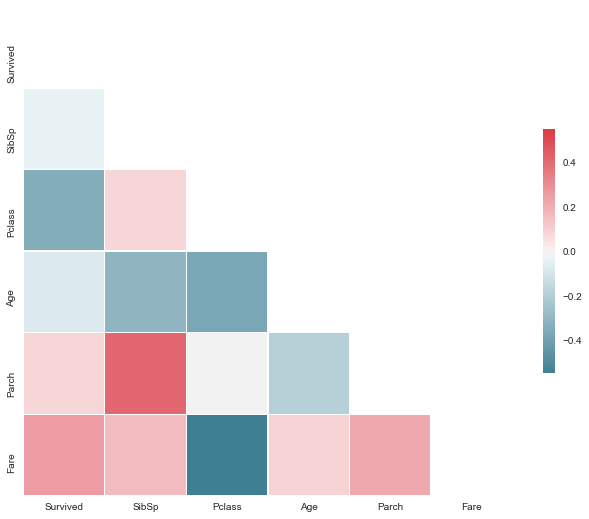

In [22]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Get the Dummy Variables

In [23]:
dd_dum = pd.get_dummies(dd)
dd_dum

,Survived,SibSp,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,3,22.0,0,7.2500,0,1,0,0,1
1,1,1,1,38.0,0,71.2833,1,0,1,0,0
2,1,0,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,1,35.0,0,53.1000,1,0,0,0,1
4,0,0,3,35.0,0,8.0500,0,1,0,0,1
5,0,0,3,NaN,0,8.4583,0,1,0,1,0
6,0,0,1,54.0,0,51.8625,0,1,0,0,1
7,0,3,3,2.0,1,21.0750,0,1,0,0,1
8,1,0,3,27.0,2,11.1333,1,0,0,0,1
9,1,1,2,14.0,0,30.0708,1,0,1,0,0


## Remove Missing Records

In [24]:
dd_dum.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

## Train Test Split

In [25]:
?RandomForestClassifier

Object `RandomForestClassifier` not found.


In [26]:
from sklearn.model_selection import train_test_split
seed = 1234

x = dd_dum.drop('Survived', axis=1)
y = dd_dum['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=seed)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# link http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py
n_estimator = 20

rf = RandomForestClassifier(max_depth=10, n_estimators=n_estimator)
rf.fit(x_train, y_train)
print('The mean accuracy: {}'.format( np.round(rf.score(x_test, y_test), 3) ))

The mean accuracy: 0.778


## Find the best model with a grid search

In [28]:
acc = []
log = []
i = 0
for est in range(6, 13):
    for depth in range(2,10):
        rf = RandomForestClassifier(max_depth=depth, n_estimators=est)
        rf.fit(x_train, y_train)
        scr = rf.score(x_test, y_test)
        details = 'Model {}, n_estimators={}, max-depth={} The mean accuracy={}'.format( i, est, depth, np.round(scr, 3) )
        print(details)
        acc.append(scr)
        log.append(details)
        # iterate
        i += 1

Model 0, n_estimators=6, max-depth=2 The mean accuracy=0.694
Model 1, n_estimators=6, max-depth=3 The mean accuracy=0.736
Model 2, n_estimators=6, max-depth=4 The mean accuracy=0.778
Model 3, n_estimators=6, max-depth=5 The mean accuracy=0.75
Model 4, n_estimators=6, max-depth=6 The mean accuracy=0.764
Model 5, n_estimators=6, max-depth=7 The mean accuracy=0.736
Model 6, n_estimators=6, max-depth=8 The mean accuracy=0.708
Model 7, n_estimators=6, max-depth=9 The mean accuracy=0.764
Model 8, n_estimators=7, max-depth=2 The mean accuracy=0.694
Model 9, n_estimators=7, max-depth=3 The mean accuracy=0.736
Model 10, n_estimators=7, max-depth=4 The mean accuracy=0.778
Model 11, n_estimators=7, max-depth=5 The mean accuracy=0.806
Model 12, n_estimators=7, max-depth=6 The mean accuracy=0.75
Model 13, n_estimators=7, max-depth=7 The mean accuracy=0.792
Model 14, n_estimators=7, max-depth=8 The mean accuracy=0.778
Model 15, n_estimators=7, max-depth=9 The mean accuracy=0.75
Model 16, n_estimator

## Best Model

In [29]:
log[np.argmax(acc)]

'Model 35, n_estimators=10, max-depth=5 The mean accuracy=0.819'

In [30]:
n_estimator = 20
depth=10

rf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator)
rf.fit(x_train, y_train)
print('The mean accuracy: {}'.format( np.round(rf.score(x_test, y_test), 3) ))

The mean accuracy: 0.722


In [31]:
preds = rf.predict(x)
preds[0:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [32]:
dd_dum['preds'] = preds

In [33]:
dd_dum

,Survived,SibSp,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,preds
0,0,1,3,22.0,0,7.2500,0,1,0,0,1,0
1,1,1,1,38.0,0,71.2833,1,0,1,0,0,1
2,1,0,3,26.0,0,7.9250,1,0,0,0,1,1
3,1,1,1,35.0,0,53.1000,1,0,0,0,1,1
4,0,0,3,35.0,0,8.0500,0,1,0,0,1,0
6,0,0,1,54.0,0,51.8625,0,1,0,0,1,0
7,0,3,3,2.0,1,21.0750,0,1,0,0,1,0
8,1,0,3,27.0,2,11.1333,1,0,0,0,1,1
9,1,1,2,14.0,0,30.0708,1,0,1,0,0,1
10,1,1,3,4.0,1,16.7000,1,0,0,0,1,1


In [34]:
preds = rf.predict_proba(x)
preds2 = [p[1] for p in preds]

In [35]:
dd_dum['probs'] = preds2
dd_dum

,Survived,SibSp,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,preds,probs
0,0,1,3,22.0,0,7.2500,0,1,0,0,1,0,0.106498
1,1,1,1,38.0,0,71.2833,1,0,1,0,0,1,1.000000
2,1,0,3,26.0,0,7.9250,1,0,0,0,1,1,0.652953
3,1,1,1,35.0,0,53.1000,1,0,0,0,1,1,1.000000
4,0,0,3,35.0,0,8.0500,0,1,0,0,1,0,0.075444
6,0,0,1,54.0,0,51.8625,0,1,0,0,1,0,0.101068
7,0,3,3,2.0,1,21.0750,0,1,0,0,1,0,0.000000
8,1,0,3,27.0,2,11.1333,1,0,0,0,1,1,0.900000
9,1,1,2,14.0,0,30.0708,1,0,1,0,0,1,1.000000
10,1,1,3,4.0,1,16.7000,1,0,0,0,1,1,0.700000


## Gradient Boosted Machine

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimator = 30

rf = GradientBoostingClassifier(n_estimators=n_estimator)
rf.fit(x_train, y_train)
print('The mean accuracy: {}'.format( np.round(rf.score(x_test, y_test), 3) ))

The mean accuracy: 0.792


## Find the best model with a grid search

In [37]:
acc = []
log = []
i = 0
for est in range(10, 20):
    for depth in range(5,10):
        for lr in np.arange(0.01, 0.1, 0.02):
            rf = GradientBoostingClassifier(max_depth=depth, n_estimators=est, learning_rate=lr)
            rf.fit(x_train, y_train)
            scr = rf.score(x_test, y_test)
            details = 'Model {}, n_estimators={}, max-depth={}, learning_rate={}, The mean accuracy={}'.format( i, est, depth, lr, np.round(scr, 3) )
            print(details)
            acc.append(scr)
            log.append(details)
            # iterate
            i += 1

Model 0, n_estimators=10, max-depth=5, learning_rate=0.01, The mean accuracy=0.611
Model 1, n_estimators=10, max-depth=5, learning_rate=0.03, The mean accuracy=0.75
Model 2, n_estimators=10, max-depth=5, learning_rate=0.049999999999999996, The mean accuracy=0.778
Model 3, n_estimators=10, max-depth=5, learning_rate=0.06999999999999999, The mean accuracy=0.792
Model 4, n_estimators=10, max-depth=5, learning_rate=0.08999999999999998, The mean accuracy=0.792
Model 5, n_estimators=10, max-depth=6, learning_rate=0.01, The mean accuracy=0.611
Model 6, n_estimators=10, max-depth=6, learning_rate=0.03, The mean accuracy=0.778
Model 7, n_estimators=10, max-depth=6, learning_rate=0.049999999999999996, The mean accuracy=0.75
Model 8, n_estimators=10, max-depth=6, learning_rate=0.06999999999999999, The mean accuracy=0.736
Model 9, n_estimators=10, max-depth=6, learning_rate=0.08999999999999998, The mean accuracy=0.764
Model 10, n_estimators=10, max-depth=7, learning_rate=0.01, The mean accuracy=0.

Model 92, n_estimators=13, max-depth=8, learning_rate=0.049999999999999996, The mean accuracy=0.764
Model 93, n_estimators=13, max-depth=8, learning_rate=0.06999999999999999, The mean accuracy=0.736
Model 94, n_estimators=13, max-depth=8, learning_rate=0.08999999999999998, The mean accuracy=0.736
Model 95, n_estimators=13, max-depth=9, learning_rate=0.01, The mean accuracy=0.611
Model 96, n_estimators=13, max-depth=9, learning_rate=0.03, The mean accuracy=0.736
Model 97, n_estimators=13, max-depth=9, learning_rate=0.049999999999999996, The mean accuracy=0.736
Model 98, n_estimators=13, max-depth=9, learning_rate=0.06999999999999999, The mean accuracy=0.75
Model 99, n_estimators=13, max-depth=9, learning_rate=0.08999999999999998, The mean accuracy=0.764
Model 100, n_estimators=14, max-depth=5, learning_rate=0.01, The mean accuracy=0.611
Model 101, n_estimators=14, max-depth=5, learning_rate=0.03, The mean accuracy=0.778
Model 102, n_estimators=14, max-depth=5, learning_rate=0.0499999999

Model 180, n_estimators=17, max-depth=6, learning_rate=0.01, The mean accuracy=0.75
Model 181, n_estimators=17, max-depth=6, learning_rate=0.03, The mean accuracy=0.764
Model 182, n_estimators=17, max-depth=6, learning_rate=0.049999999999999996, The mean accuracy=0.736
Model 183, n_estimators=17, max-depth=6, learning_rate=0.06999999999999999, The mean accuracy=0.75
Model 184, n_estimators=17, max-depth=6, learning_rate=0.08999999999999998, The mean accuracy=0.736
Model 185, n_estimators=17, max-depth=7, learning_rate=0.01, The mean accuracy=0.764
Model 186, n_estimators=17, max-depth=7, learning_rate=0.03, The mean accuracy=0.75
Model 187, n_estimators=17, max-depth=7, learning_rate=0.049999999999999996, The mean accuracy=0.736
Model 188, n_estimators=17, max-depth=7, learning_rate=0.06999999999999999, The mean accuracy=0.736
Model 189, n_estimators=17, max-depth=7, learning_rate=0.08999999999999998, The mean accuracy=0.736
Model 190, n_estimators=17, max-depth=8, learning_rate=0.01, 

## Best Model

In [38]:
log[np.argmax(acc)]

'Model 28, n_estimators=11, max-depth=5, learning_rate=0.06999999999999999, The mean accuracy=0.806'

# NEURAL NETWORK

In [39]:
# Prepare the label data
y_train_dv = np.array(pd.get_dummies(y_train))
y_test_dv = np.array(pd.get_dummies(y_test))
X_train = np.array(x_train)
X_test = np.array(x_test)

In [40]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
print('Done')

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5),
    ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=0)
]


n_classes = 2
epochs = 100
learn_rate = 0.001
batch_size= 256
dropout = 0.1
init_mean = 0.0
init_stdev = 0.05

m = Sequential()
m.add(Dense(15, activation='relu', input_shape=(10,)))
m.add(Dense(30, activation='relu'))
m.add(Dropout(dropout))
m.add(Dense(50, activation='relu'))
m.add(Dense(50, activation='relu'))
m.add(Dropout(dropout))
m.add(Dense(30, activation='relu'))
m.add(Dense(10, activation='relu'))
m.add(Dense(n_classes, activation='softmax'))  # None = linear activation for regression

m.compile(
    optimizer=optimizers.Adam(lr=learn_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print('Starting training....')

history_object = m.fit(X_train, 
          y_train_dv, 
          validation_split=0.1,
          shuffle=True,
          epochs=epochs,
          batch_size=batch_size,
          callbacks=callbacks)

print('Done')

Using TensorFlow backend.


Done
Starting training....
Train on 577 samples, validate on 65 samples
Epoch 1/100
577/577 [==============================] - 0s - loss: 3.1234 - acc: 0.6049 - val_loss: 2.6675 - val_acc: 0.4769
Epoch 2/100
577/577 [==============================] - 0s - loss: 2.3118 - acc: 0.6049 - val_loss: 1.6805 - val_acc: 0.4769
Epoch 3/100
577/577 [==============================] - 0s - loss: 1.5559 - acc: 0.6049 - val_loss: 0.9904 - val_acc: 0.4769
Epoch 4/100
577/577 [==============================] - 0s - loss: 0.9841 - acc: 0.6049 - val_loss: 0.7551 - val_acc: 0.4769
Epoch 5/100
577/577 [==============================] - 0s - loss: 0.7653 - acc: 0.6049 - val_loss: 0.7357 - val_acc: 0.4769
Epoch 6/100
577/577 [==============================] - 0s - loss: 0.7342 - acc: 0.5979 - val_loss: 0.7169 - val_acc: 0.5077
Epoch 7/100
577/577 [==============================] - 0s - loss: 0.7063 - acc: 0.6031 - val_loss: 0.6948 - val_acc: 0.5231
Epoch 8/100
577/577 [==============================] - 0s - 

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])


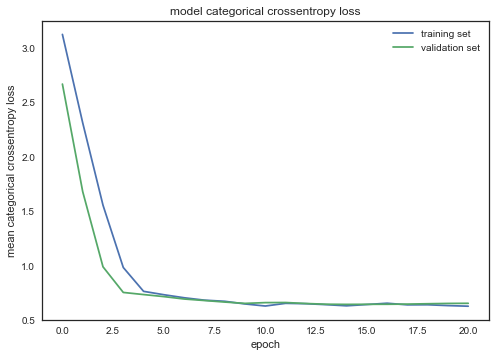

In [41]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model categorical crossentropy loss')
plt.ylabel('mean categorical crossentropy loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

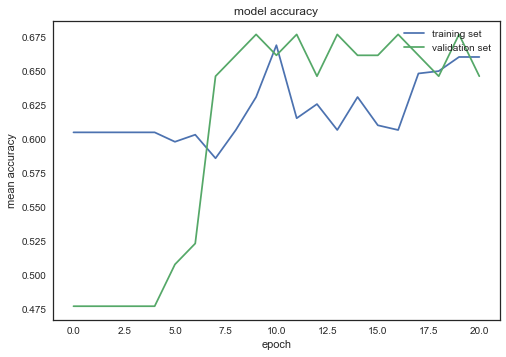

In [42]:
### plot the training and validation loss for each epoch
plt.plot(history_object.history['acc'])
plt.plot(history_object.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('mean accuracy')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [43]:
col_names = m.metrics_names
values = m.evaluate(x=X_test, y=y_test_dv, batch_size=256)

print(col_names[0], values[0]) 
print(col_names[1], values[1])

72/72 [==============================] - 0s
loss 0.618418395519
acc 0.722222208977
